In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls

EmotionDataAnalysis.ipynb dataanalysis
Methods team lab.pdf      datasets


In [3]:
train_data = "datasets/isear-train.csv"

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df_train = None

try:
    df_train = pd.read_csv(train_data, on_bad_lines="skip")
except Exception as e:
    print("Error:", e)

In [24]:
from collections import Counter

# Access iloc on df_train
if df_train is not None:
    labels = df_train.iloc[:, 0]

# Assuming unique_labels contains all the labels
# Split the labels into words and count their frequency
word_counts = Counter(word.strip().lower() for label in labels for word in label.split(','))
#print(word_counts)

# Define a threshold for the minimum frequency of a word to be considered an emotion
threshold = 10 # Adjust as needed

# Filter out words with frequency above the threshold as potential emotions
valid_emotions = {word for word, count in word_counts.items() if count >= threshold}
print(valid_emotions)

# Filter out words with frequency above the threshold as potential emotions
potential_emotions_counts = {word: count for word, count in word_counts.items() if count >= threshold}

# Print the potential emotions
print(potential_emotions_counts)

# Filter out rows with invalid emotion labels
valid_rows = df_train[df_train.iloc[:, 0].str.lower().str.strip().str.split(',').apply(lambda labels: any(label.strip().lower() in valid_emotions for label in labels))]

# Create a new DataFrame with valid rows
new_df_train = pd.DataFrame(valid_rows.values, columns=df_train.columns)
print("columns")
print(df_train.columns)

new_labels = new_df_train.iloc[:, 0]

# Assuming unique_labels contains all the labels
# Split the labels into words and count their frequency
word_counts = Counter(word.strip().lower() for label in new_labels for word in label.split(','))

print(word_counts)
# Print the new DataFrame
#print(new_df_train)

{'joy', 'shame', 'guilt', 'fear', 'sadness', 'anger', 'disgust'}
{'fear': 752, 'joy': 777, 'shame': 758, 'disgust': 757, 'guilt': 766, 'anger': 758, 'sadness': 760}
columns
Index(['joy', 'When I understood that I was admitted to the University.'], dtype='object')
Counter({'joy': 777, 'guilt': 766, 'sadness': 760, 'shame': 758, 'anger': 758, 'disgust': 757, 'fear': 752, 'i was walking home from a place on southside and i live on northside and i was followed. i headed my most direct route."': 1, 'i could have died when i was caught cheating on a test in high school. that was my first and last time."': 1, 'last course': 1})


In [25]:
valid_emotions = ["joy", "fear", "shame", "disgust", "guilt", "anger", "sadness"]
filtered_df_train = df_train[df_train.iloc[:, 0].str.split(",", expand=True)[0].isin(valid_emotions)]

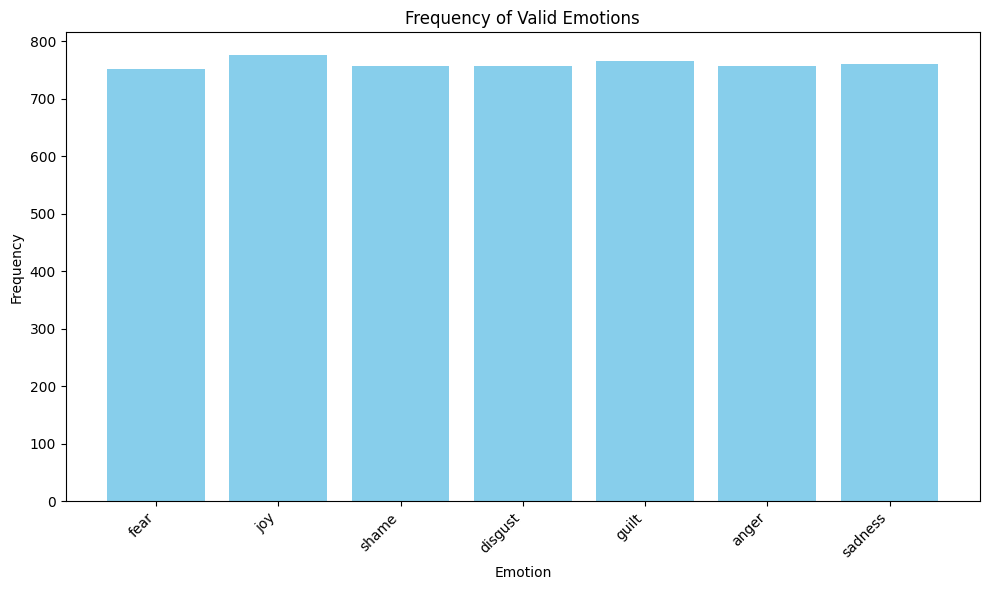

In [15]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(potential_emotions_counts.keys(), potential_emotions_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Valid Emotions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix

# Ground truth labels (y_true)
y_true = filtered_df_train.iloc[:, 0]
print(y_true)

# Predicted labels (assuming y_pred is the same as y_true)
y_pred = y_true

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


0          fear
1           joy
2          fear
3         shame
4       disgust
         ...   
5327    sadness
5328      guilt
5329       fear
5330    disgust
5331      shame
Name: joy, Length: 5325, dtype: object
Confusion Matrix:
[[758   0   0   0   0   0   0]
 [  0 757   0   0   0   0   0]
 [  0   0 751   0   0   0   0]
 [  0   0   0 766   0   0   0]
 [  0   0   0   0 776   0   0]
 [  0   0   0   0   0 760   0]
 [  0   0   0   0   0   0 757]]


In [35]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['fear', 'joy', 'shame', 'disgust', 'guilt', 'anger', 'sadness'])

# Print precision, recall, and F-score for each emotion
for emotion, prec, rec, f in zip(['fear', 'joy', 'shame', 'disgust', 'guilt', 'anger', 'sadness'], precision, recall, fscore):
    print(f"Emotion: {emotion}, Precision: {prec:.2f}, Recall: {rec:.2f}, F-score: {f:.2f}")

# Calculate overall F-score (average of F-scores across all classes)
overall_fscore = fscore.mean()
print(f"Overall F-score: {overall_fscore:.2f}")

Emotion: fear, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: joy, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: shame, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: disgust, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: guilt, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: anger, Precision: 1.00, Recall: 1.00, F-score: 1.00
Emotion: sadness, Precision: 1.00, Recall: 1.00, F-score: 1.00
Overall F-score: 1.00
